# Explore here

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

#We are getting the client id and client sercert
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [4]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify()


con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [7]:
artist_id = "50Y5tJX1MQlPlqiwlOH1tJY"


response = con.artist_top_tracks("0Y5tJX1MQlPlqiwlOH1tJY")
if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [8]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms                            name  popularity
7     4.063933                      goosebumps          86
8     4.852917  Fair Trade (with Travis Scott)          86
9     5.213667                      SICKO MODE          86


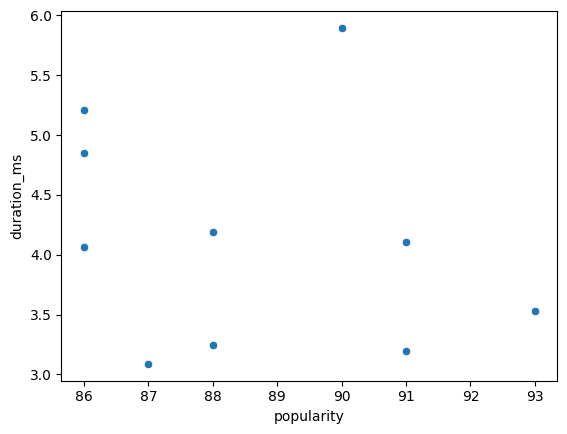

In [9]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")

From observing the plot, we can see there isn't a correlation or direct relationship between the length of the song and its popularity. You can see this by looking at the points plotted and seeing them all scattered around in different places along the axis's. This different range of points ploted all differently on the plot show us there isn't a direct relationship. 